# Trabajo práctico N° 2

## Enunciado

Teniendo la función

$$f(x) = 0.01x + (\sin(x)^2) \times (\sin(4x)^2) \times (0.5\phi(x))$$

donde $\phi$ es la función de densidad de probabilidad normal estándar evaluada en $x$.

1. Implementar $f(x)$.
2. Obtener 500 muestras de la función $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.
3. Teniendo dichas muestras, graficar $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.
4. Dividir el conjunto total $(x,f(x))$ en un subconjunto de entrenamiento del 70% de las muestras y un subconjunto de test del 30% de las muestras.
5. Usar el subconjunto de entrenamiento para entrenar un modelo de regresión lineal para aproximar $f(x)$ en el mencionado intervalo.
6. Mostrar gráficamente la regresión para el conjunto de entrenamiento y para el conjunto de test.
7. Imprimir el error cuadrático medio para las predicciones sobre los $X$ de entrenamiento y los $X$ de test.


Fecha de entrega: **19/04/2017**.

Nota: la resolución de los ejercicios es **individual**. Está permitida la reutilización del código del notebook (por ejemplo para confeccionar gráficos).

## Desarrollo

#### Se implementó $f(x)$

In [17]:
import numpy as np
from scipy.stats import norm

def f(x):
   return 0.01*x+np.power(np.sin(x),2)*np.power(np.sin(4*x),2)*(0.5*norm.pdf(x))


#### Se obtuvieron 500 muestras de la función $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.

In [15]:
x = np.linspace(-3, 3, 500)

#### Se graficó $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.

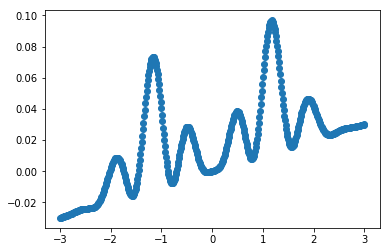

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(x, f(x),'o')

#### Se añade una nueva dimensión a $x$ para formar un array bidimensional

In [19]:
X = x[:, np.newaxis]

#### Se dividió el conjunto total $(x,f(x))$ en un subconjunto de entrenamiento del 70% de las muestras y un subconjunto de test del 30% de las muestras.
* 0 - 350 --> Entrenamiento (train)
* 350 - 500 --> Prueba (test)   

In [21]:
X_train = X[0:350]
X_test = X[350:500]
y_train = f(x)[0:350]
y_test = f(x)[350:500]

#### Se utilizó el subconjunto de entrenamiento para entrenar un modelo de regresión lineal para aproximar $f(x)$ en el mencionado intervalo.

In [22]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Se muestra a continuacion los coeficientes del modelo obtenido

In [23]:
print('Weight coefficients (beta_1): ', regressor.coef_)
print('y-axis intercept (beta_0): ', regressor.intercept_)

Weight coefficients (beta_1):  [ 0.01608022]
y-axis intercept (beta_0):  0.0254445673114


Dado que nuestro modelo de regresión es lineal, la relación entre la variable de respuesta $y$ y la variable de entrada $x$ se define como:
$$y \approx weight \times x + \text{intercept}$$

Teniendo en cuenta los valores mínimos y máximos del dataset, podemos ver gráficamente cómo se ajusta el modelo a nuestros datos de entrenamiento:

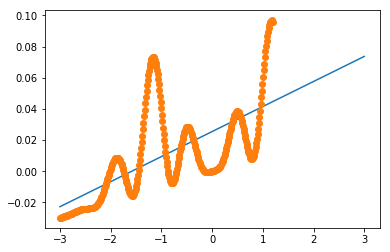

In [24]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

#### Se graficó la regresión para el subconjunto de entrenamiento

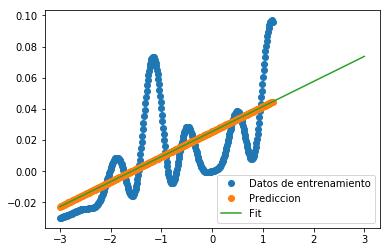

In [25]:
y_pred_train = regressor.predict(X_train)
plt.plot(X_train, y_train, 'o', label="Datos de entrenamiento")
plt.plot(X_train, y_pred_train, 'o', label="Prediccion")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='Fit')
plt.legend(loc='best')

#### Se graficó la regresión para el subconjunto de test

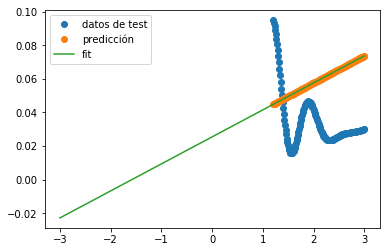

In [9]:
y_pred_test = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="Datos de test")
plt.plot(X_test, y_pred_test, 'o', label="Predicción")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

#### Se calculó el error cuadrático medio para las predicciones sobre los $X$ de entrenamiento.

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test)

0.0010926307695542973

#### Se calculó el error cuadrático medio para las predicciones sobre los $X$ de test.

In [12]:
mean_squared_error(y_train, y_pred_train)

0.00051508308831770097